In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.6/124.9 MB 15.1 MB/s eta 0:00:09
   -- ------------------------------------- 6.8/124.9 MB 17.5 MB/s eta 0:00:07
   --- ------------------------------------ 10.5/124.9 MB 17.7 MB/s eta 0:00:07
   ---- ----------------------------------- 14.7/124.9 MB 18.1 MB/s eta 0:00:07
   ----- ---------------------------------- 18.1/124.9 MB 17.6 MB/s eta 0:00:07
   ------- -------------------------------- 22.5/124.9 MB 18.1 MB/s eta 0:00:06
   -------- ------------------------------- 27.0/124.9 MB 18.4 MB/s eta 0:00:06
   --------- ------------------------------ 30.9/124.9 MB 18.5 MB/s eta 0:00:06
   ----------- ---------------------------- 34.6/124.9 MB 18.3 MB/s eta 0:00:05
   ------------ --------------------------- 39.3/124.9 MB 18.7 MB/s eta 0:00:05
   ------------- -------------------------- 41.9/124.9 MB 18.1 MB/s eta 0:00:05
   -------------- ------------------------- 46.1/12

In [5]:
from xgboost import XGBRegressor

In [6]:
df=pd.read_csv("stud.csv")

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
from catboost import CatBoostRegressor

In [11]:
x=df.drop(columns=['math_score'],axis=1)

In [13]:
y=df['math_score']

In [16]:
num_features=[features for features in x.columns if x[features].dtype!='object']
cat_features=[features for features in x.columns if x[features].dtype=='object']

In [21]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=([
    ("OneHotEncoder",OneHotEncoder(),cat_features),
    ("StandardScaler",StandardScaler(),num_features)
]))

In [23]:
x=ct.fit_transform(x)

In [25]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train.shape

(800, 19)

In [28]:
x_test.shape

(200, 19)

In [39]:
def metric(y_test,y_pred):
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    return mae,mse,r2,rmse

In [41]:
models={
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoostRegressor':CatBoostRegressor(verbose=False),
    'AdaBoostRegressor':AdaBoostRegressor()
}
model_list = []
r2_list = []

for model_name,model_instances in models.items():
    print(model_name)
    reg=model_instances
    reg.fit(x_train,y_train)
    y_pred_train=reg.predict(x_train)
    y_pred_test=reg.predict(x_test)
    mae_trained,mse_trained,r2_trained,rmse_trained=metric(y_train,y_pred_train)
    mae_test,mse_test,r2_test,rmse_test=metric(y_test,y_pred_test)
 
    
    print("For Trained Data")
    print(f"mae is {mae_trained}")
    print(f"mse is {mse_trained}")
    print(f"r2 is {r2_trained}")
    print(f"rmse is {rmse_trained}")


    print("For Test Data")
    print(f"mae is {mae_test}")
    print(f"mse is {mse_test}")
    print(f"r2 is {r2_test}")
    print(f"rmse is {rmse_test}")

    model_list.append(model_name)
    r2_list.append(r2_test)

LinearRegression
For Trained Data
mae is 4.27875
mse is 28.38054382324219
r2 is 0.874114613852425
rmse is 5.327339281784312
For Test Data
mae is 4.2259375
mse is 29.26380859375
r2 is 0.8797402769404664
rmse is 5.40960336750764
RandomForestRegressor
For Trained Data
mae is 1.8244468749999998
mse is 5.204203695347931
r2 is 0.9769161156368331
rmse is 2.281272385171909
For Test Data
mae is 4.647895833333333
mse is 36.23363368402778
r2 is 0.8510977565233117
rmse is 6.0194379873895025
Ridge
For Trained Data
mae is 4.26498782372598
mse is 28.337788233082442
r2 is 0.8743042615212909
rmse is 5.323324922741654
For Test Data
mae is 4.211100688014259
mse is 29.056272192348278
r2 is 0.8805931485028738
rmse is 5.390387016935637
Lasso
For Trained Data
mae is 5.206302661246526
mse is 43.47840400585579
r2 is 0.8071462015863456
rmse is 6.593815587795566
For Test Data
mae is 5.157881810347763
mse is 42.50641683841162
r2 is 0.8253197323627852
rmse is 6.51969453566742
KNeighborsRegressor
For Trained Data
m

In [42]:
model_list

['LinearRegression',
 'RandomForestRegressor',
 'Ridge',
 'Lasso',
 'KNeighborsRegressor',
 'XGBRegressor',
 'CatBoostRegressor',
 'AdaBoostRegressor']

In [43]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])


,Model Name,R2_Score
0,LinearRegression,0.879740
1,RandomForestRegressor,0.851098
2,Ridge,0.880593
3,Lasso,0.825320
4,KNeighborsRegressor,0.783898
5,XGBRegressor,0.827797
6,CatBoostRegressor,0.851632
7,AdaBoostRegressor,0.851046


In [44]:
model=LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [45]:
score=r2_score(y_test,y_pred)
print(f"Score is {score}")

Score is 0.8797402769404664


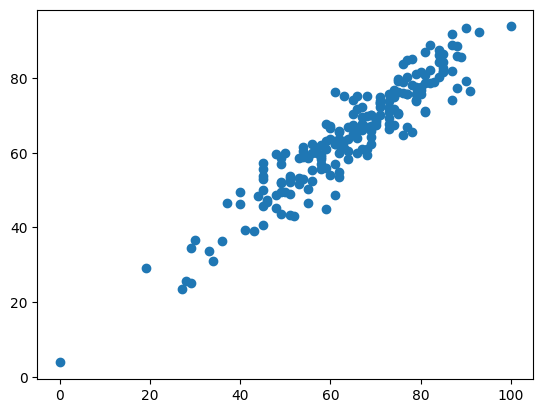

In [46]:
plt.scatter(y_test,y_pred)

In [47]:
pred_df=pd.DataFrame({'Actual':y_test,'predicted':y_pred,'Difference':y_test-y_pred})

In [48]:
pred_df

,Actual,predicted,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
